# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.11.0


# Task 2: Rotation

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=50
)

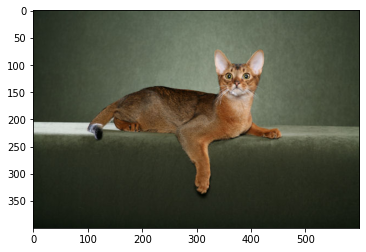

In [19]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


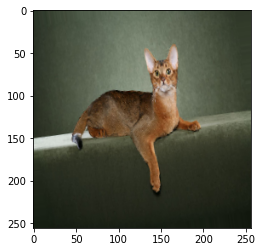

In [22]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [23]:
x.shape

(1, 256, 256, 3)

# Task 3: Width and Height Shifts

In [28]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100, -50, 0 , 50, 100], #list values of shifting on horizontal axis. Explicitly giving shift value
    height_shift_range=[-50, 0, 50] #list values of shifting on vertical axis. 
)

Found 1 images belonging to 2 classes.


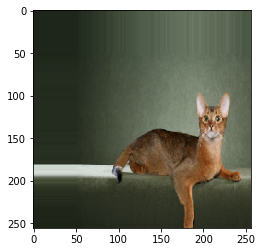

In [29]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 2 classes.


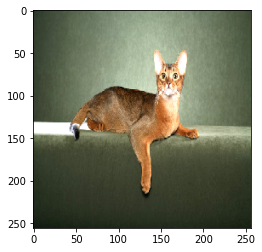

In [31]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5, 2.0) # 1 means default brightness value.
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [34]:
x[0].astype('uint8')

array([[[42, 53, 38],
        [42, 53, 38],
        [42, 53, 38],
        ...,
        [60, 72, 53],
        [60, 72, 53],
        [57, 69, 50]],

       [[41, 52, 36],
        [42, 53, 38],
        [45, 56, 41],
        ...,
        [63, 74, 56],
        [63, 74, 56],
        [60, 72, 53]],

       [[41, 52, 36],
        [42, 53, 38],
        [45, 56, 41],
        ...,
        [63, 74, 56],
        [63, 74, 56],
        [62, 73, 55]],

       ...,

       [[16, 26, 15],
        [16, 26, 15],
        [16, 26, 15],
        ...,
        [24, 35, 19],
        [22, 33, 18],
        [21, 32, 16]],

       [[15, 25, 14],
        [15, 25, 14],
        [16, 26, 15],
        ...,
        [22, 33, 18],
        [22, 33, 18],
        [21, 32, 16]],

       [[15, 25, 14],
        [14, 24, 12],
        [15, 25, 14],
        ...,
        [21, 32, 16],
        [21, 32, 16],
        [21, 32, 16]]], dtype=uint8)

# Task 5: Shear Transformation

Found 1 images belonging to 2 classes.


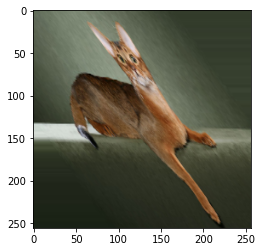

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=50
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Task 6: Zoom

zoom_range	Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].

Found 1 images belonging to 2 classes.


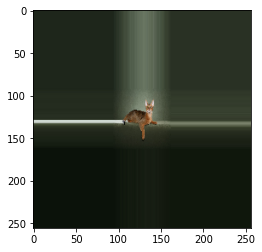

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=(0.2, 5)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 2 classes.


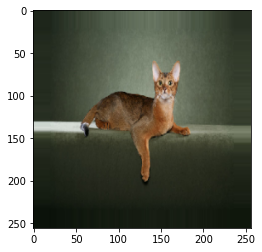

In [65]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
   zoom_range = [0.8, 1.2]
)
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 2 classes.


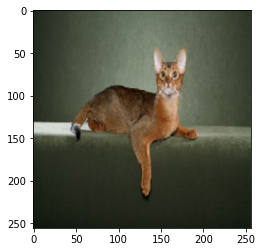

In [69]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
   zoom_range = 0.2
)
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 2 classes.


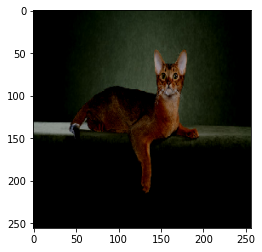

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [40]:
x.mean()

14.073166

In [41]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 2 classes.


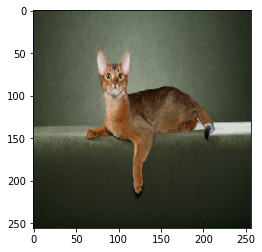

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True, #Random horizontal flip
    vertical_flip=True, #Random Vertical flip
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Example to normalize
x_mean = x_train.mean()
x_std = x_train.std()
x_train_norm = (x_train - x_mean)/x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
  featurewise_center=True, #Values will be updated by subtracting mean on all value.
  featurewise_std_normalization= True #Standard Normalization
)

generator.fit(x_train)

170498071/170498071 [==============================] - 4s 0us/step


In [45]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean()) 

0.24954022 0.98933053 [[1]]
120.70756512369792


### Samplewise

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-3.973643e-08 1.0 [[0]]


# Task 10: Rescale and Preprocessing Function

In [47]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale =1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input #using pre-processing function from mobilenetv2
)

In [48]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [49]:
print(x.mean(), x.std(), y)

0.12404772 0.40367395 [[0]]


# Task 11: Using in Model Training

Creat Generator



In [52]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
  preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
  horizontal_flip=True,
  rotation_range=15,
  resize
)

In [57]:
#Test shape of the input
x, y = next(generator.flow(x_train, y_train, batch_size=1))
x.shape

(1, 32, 32, 3)

**Create Model**

In [50]:
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32,32,3), pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


**Model Compile**

In [54]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

**Fit Model**

Here important to know, using flow method of generator we can make a iterator and these can be passed to fit method of the model.

In [58]:
_ = model.fit(
    generator.flow(x_train,y_train, batch_size=32),
    epochs=50,steps_per_epoch=10
)

Epoch 1/50
10/10 [==============================] - 3s 281ms/step - loss: 2.4328 - accuracy: 0.0906
Epoch 2/50
10/10 [==============================] - 3s 279ms/step - loss: 2.6173 - accuracy: 0.1125
Epoch 3/50
10/10 [==============================] - 2s 246ms/step - loss: 2.0675 - accuracy: 0.0875
Epoch 4/50
10/10 [==============================] - 3s 340ms/step - loss: 1.9498 - accuracy: 0.0344
Epoch 5/50
10/10 [==============================] - 2s 246ms/step - loss: 2.0446 - accuracy: 0.0437
Epoch 6/50
10/10 [==============================] - 2s 243ms/step - loss: 1.9048 - accuracy: 0.0437
Epoch 7/50
10/10 [==============================] - 2s 245ms/step - loss: 1.9729 - accuracy: 0.0844
Epoch 8/50
10/10 [==============================] - 3s 329ms/step - loss: 1.9342 - accuracy: 0.0493
Epoch 9/50
10/10 [==============================] - 2s 246ms/step - loss: 1.8296 - accuracy: 0.0969
Epoch 10/50
10/10 [==============================] - 3s 250ms/step - loss: 1.8762 - accuracy: 0.1000